# Demo Data Preprocessing

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df = sns.load_dataset('mpg')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [182]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [183]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### Remove rows with missing data

In [184]:
df.dropna(inplace=True)

In [185]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

### Determine target

In [186]:
target = 'mpg'

In [ ]:
features = [col for col in df.columns if col not in [target, 'name']]
features

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

In [ ]:
df_target = df[[target]]
df_features = df[features]

### One-hot encoding

In [189]:
df_encoded = pd.get_dummies(df_features, drop_first=True, dtype='int')
df_encoded

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,70,0,1
1,8,350.0,165.0,3693,11.5,70,0,1
2,8,318.0,150.0,3436,11.0,70,0,1
3,8,304.0,150.0,3433,12.0,70,0,1
4,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0,1
394,4,97.0,52.0,2130,24.6,82,0,0
395,4,135.0,84.0,2295,11.6,82,0,1
396,4,120.0,79.0,2625,18.6,82,0,1


### Scaling

In [161]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [162]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

scaler.fit(df_encoded)

MinMaxScaler()

In [163]:
scaler.scale_.round(3)

array([0.2  , 0.003, 0.005, 0.   , 0.06 , 0.083, 1.   , 1.   ])

In [190]:
df_scaled = pd.DataFrame(scaler.transform(df_encoded), columns=df_encoded.columns)
df_scaled

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,1.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
387,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,1.0
388,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.0,0.0
389,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,1.0
390,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,1.0


### Split in Training en Test dataset

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
df_train_features, df_test_features, df_train_target, df_test_target = train_test_split(df_scaled, df_target, test_size=0.3)

In [191]:
print('train dataset features', df_train_features.shape)
print('train dataset target', df_train_target.shape)
print('test dataset features', df_test_features.shape)
print('test dataset target', df_test_target.shape)

train dataset features (274, 8)
train dataset target (274, 1)
test dataset features (118, 8)
test dataset target (118, 2)


### Regression

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
regressor = LinearRegression()

In [195]:
regressor.fit(df_train_features, df_train_target)

LinearRegression()

In [226]:
dict(zip(regressor.feature_names_in_, regressor.coef_[0]))

{'cylinders': -3.152856876357805,
 'displacement': 11.49007802412103,
 'horsepower': -2.2431783010590824,
 'weight': -24.052679917008824,
 'acceleration': 3.713074706075961,
 'model_year': 8.942262433130685,
 'origin_japan': 0.2234356098310697,
 'origin_usa': -3.023616357685233}

In [200]:
regressor.intercept_

array([26.69950182])

In [171]:
predicted = regressor.predict(df_test_features)

In [172]:
df_test_target['predicted_linear_regression'] = predicted

In [152]:
df_test_target

,mpg,predicted_linear_regression
190,14.5,15.881153
214,13.0,17.594374
3,16.0,14.684707
391,36.0,30.357247
256,20.5,21.846032
...,...,...
52,30.0,26.005620
72,15.0,13.388314
287,16.5,20.503756
103,11.0,10.041242


In [205]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [210]:
mae = mean_absolute_error(df_test_target['mpg'], predicted)
rmse = mean_squared_error(df_test_target['mpg'], predicted) ** 0.5
r2 = r2_score(df_test_target['mpg'], predicted)

In [211]:
print('mae', mae)
print('rmse', rmse)
print('r2 score', r2)

mae 2.7674499568949202
rmse 3.525158446626625
r2 score 0.8275149323171516


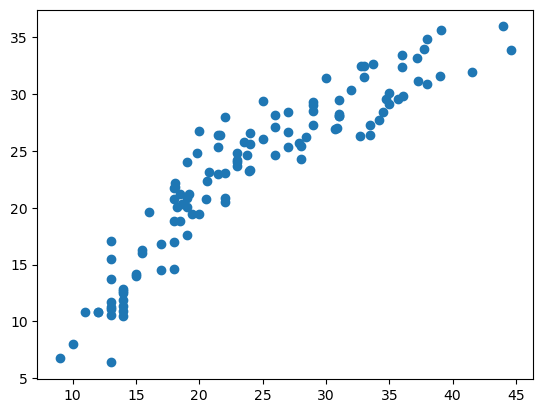

In [212]:
plt.scatter(df_test_target['mpg'], predicted)
plt.show()

In [227]:
 from sklearn.neighbors import KNeighborsRegressor

In [228]:
regressor = KNeighborsRegressor()
regressor.fit(df_train_features, df_train_target)

KNeighborsRegressor()

In [230]:
predicted = regressor.predict(df_test_features)
df_test_target['predicted_nearest_neighbor'] = predicted

In [231]:
df_test_target

,mpg,predicted_linear_regression,predicted_nearest_neighbor
19,26.0,28.178700,26.80
269,30.9,26.980734,29.00
201,18.5,18.833604,18.10
341,23.5,25.751768,23.68
238,33.5,27.296644,28.40
...,...,...,...
108,20.0,26.766251,27.20
261,18.1,21.799075,19.40
44,13.0,6.384061,12.60
191,22.0,20.846120,20.10


In [232]:
mae = mean_absolute_error(df_test_target['mpg'], predicted)
rmse = mean_squared_error(df_test_target['mpg'], predicted) ** 0.5
r2 = r2_score(df_test_target['mpg'], predicted)

print('mae', mae)
print('rmse', rmse)
print('r2 score', r2)

mae 2.206271186440677
rmse 2.977692770802276
r2 score 0.8769294922873895


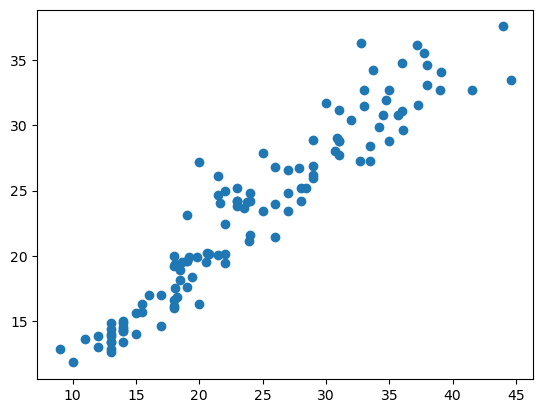

In [233]:
plt.scatter(df_test_target['mpg'], predicted)
plt.show()